# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/main/Lectures%20and%20codes/Module%2010-%20Bagging%20and%20Boosting/Python/boosting/XGBOOST_classification_creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

## Boosting models:
1. AdaBoost
2. GBM
3. XGBoost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/credit_card_clean.csv')

In [3]:
rand_state = 1000

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Exploring the variables:

1. __ID__ : ID of each client 

2. __LIMIT_BAL__: Amount of given credit in NT dollars (includes individual and family/supplementary credit) 


3. __SEX__: Gender (1=male, 2=female)

4. __EDUCATION__: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

5. __MARRIAGE__: Marital status (1=married, 2=single, 3=others)

6. __AGE__: Age in years

7. __PAY_1__: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

8. __PAY_2__: Repayment status in August, 2005 (scale same as above)

9. __PAY_3__: Repayment status in July, 2005 (scale same as above)

10. __PAY_4__: Repayment status in June, 2005 (scale same as above)

11. __PAY_5__: Repayment status in May, 2005 (scale same as above)

12. __PAY_6__: Repayment status in April, 2005 (scale same as above)

13. __BILL_AMT1__: Amount of bill statement in September, 2005 (NT dollar)

14. __BILL_AMT2__: Amount of bill statement in August, 2005 (NT dollar)

15. __BILL_AMT3__: Amount of bill statement in July, 2005 (NT dollar)

16. __BILL_AMT4__: Amount of bill statement in June, 2005 (NT dollar)

17. __BILL_AMT5__: Amount of bill statement in May, 2005 (NT dollar)

18. __BILL_AMT6__: Amount of bill statement in April, 2005 (NT dollar)

19. __PAY_AMT1__: Amount of previous payment in September, 2005 (NT dollar)

20. __PAY_AMT2__: Amount of previous payment in August, 2005 (NT dollar)

21. __PAY_AMT3__: Amount of previous payment in July, 2005 (NT dollar)

22. __PAY_AMT4__: Amount of previous payment in June, 2005 (NT dollar)

23. __PAY_AMT5__: Amount of previous payment in May, 2005 (NT dollar)

24. __PAY_AMT6__: Amount of previous payment in April, 2005 (NT dollar)

25. __default.payment.next.month__: Default payment (1=yes, 0=no)


*Note: NT is Taiwain Dollars*





In [5]:
df.isnull().sum()/len(df)

ID           0.0
LIMIT_BAL    0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
BILL_AMT1    0.0
BILL_AMT2    0.0
BILL_AMT3    0.0
BILL_AMT4    0.0
BILL_AMT5    0.0
BILL_AMT6    0.0
PAY_AMT1     0.0
PAY_AMT2     0.0
PAY_AMT3     0.0
PAY_AMT4     0.0
PAY_AMT5     0.0
PAY_AMT6     0.0
DEFAULT      0.0
dtype: float64

Looks good!
Now let's see if there are any duplicates!

In [6]:
sum(df.duplicated())

0

In [7]:
# dropping the duplicates:
df.drop_duplicates(inplace=True)

In [8]:
df.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        4
MARRIAGE         3
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
DEFAULT          2
dtype: int64

---

## Label Encoding categorical features as an integer array.

In random forest we don't need to transfer the categorical variables into dummy variables (using one-hot-encoding). However, the algorithm is not able to handel strings. We should transform strings into quantitative variables. 

It seems that **EDUCATION** is ordinal categotical and **SEX, MARRIAGE** are categorical variables and should be transformed into numerics. Typically, we use onehot encoder for sex and marriage but here for random forest, it is Okay to use ordinal encoder. 


In [9]:
ordinal_categoricals = ['EDUCATION']
labeled_categoricals = ['SEX', 'MARRIAGE']
categoricals         = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [10]:
# starting with ordinal categorical variables:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

ordinal_mappings = {}
for col in ordinal_categoricals:
    df[col] = oe.fit_transform(df[[col]])
    ordinal_mappings[col] = oe.categories_

ordinal_mappings

{'EDUCATION': [array(['grad', 'highschool', 'other', 'university'], dtype=object)]}

In [11]:
# now let's get into the labeled categorical variables:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

labeled_mappings = {}
for col in labeled_categoricals:
    df[col] = le.fit_transform(df[col])
    labeled_mappings[col] = le.classes_

labeled_mappings

{'SEX': array(['female', 'male'], dtype=object),
 'MARRIAGE': array(['married', 'other', 'single'], dtype=object)}

In [12]:
# finally let's set the type of the categorical variables to category:
all_categoricals = ordinal_categoricals + labeled_categoricals + categoricals
df[all_categoricals] = df[all_categoricals].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  float64 
 2   SEX        30000 non-null  category
 3   EDUCATION  30000 non-null  category
 4   MARRIAGE   30000 non-null  category
 5   AGE        30000 non-null  int64   
 6   PAY_1      30000 non-null  category
 7   PAY_2      30000 non-null  category
 8   PAY_3      30000 non-null  category
 9   PAY_4      30000 non-null  category
 10  PAY_5      30000 non-null  category
 11  PAY_6      30000 non-null  category
 12  BILL_AMT1  30000 non-null  float64 
 13  BILL_AMT2  30000 non-null  float64 
 14  BILL_AMT3  30000 non-null  float64 
 15  BILL_AMT4  30000 non-null  float64 
 16  BILL_AMT5  30000 non-null  float64 
 17  BILL_AMT6  30000 non-null  float64 
 18  PAY_AMT1   30000 non-null  float64 
 19  PAY_AMT2   30000 non-null

In [14]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,0,3.0,0,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0,3.0,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,3.0,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,3.0,0,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,3.0,0,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Scaling features
In boosting models, we don't need to scale the features!! However, you can scale the features to speed up the process a little bit and be better protected against outliers. In this example we don't scale the features for a fair comparison to our previous models applied to the same data set. 

In [13]:
# first we look at target variable proportions:
pd.crosstab(df['DEFAULT'],df['DEFAULT'], normalize='all')*100

DEFAULT,0,1
DEFAULT,,
0,77.88,0.00
1,0.00,22.12


### Defining the variables and splitting the data

In [16]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [15]:
y = df['DEFAULT']
X = df.drop(['DEFAULT','ID'], axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

---

## Boosting classification with Sklearn

In [16]:
from sklearn.ensemble import RandomForestClassifier # we will be using RF as our benchmark.

In [17]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier 

#### installing XGBoost
XGBoost is a software library that you can download and install on your machine, then access from a variety of interfaces. Specifically, XGBoost supports the following main interfaces:

1. Command Line Interface (CLI).
2. C++ (the language in which the library is written).
3. Python interface as well as a model in scikit-learn.
4. R interface as well as a model in the caret package.
5. Julia.
6. Java and JVM languages like Scala and platforms like Hadoop.

To install XGBoost in Python, follow the steps here: https://xgboost.readthedocs.io/en/latest/build.html

--- 
You can also get access to the Boosting models with PyCaret package: 
* pip isntall pycaret[full]

---
If you are using Google Colab, Xgboost is already installed! No further action required unless you need to work with a specific version of Xgboost. 

In [18]:
from xgboost import XGBClassifier

#### Training the models

In [19]:
%%time 
# Fitting RF classifier to the Training set
RF_classifier = RandomForestClassifier(random_state=rand_state)
RF_classifier.fit(X_train, y_train)

CPU times: total: 6.55 s
Wall time: 7.43 s


RandomForestClassifier(random_state=1000)

In [20]:
%%time
# Fitting AdaBoost classifier to the Training set
AdB_classifier = AdaBoostClassifier(random_state=rand_state)
AdB_classifier.fit(X_train, y_train)

CPU times: total: 1.83 s
Wall time: 2.07 s


AdaBoostClassifier(random_state=1000)

In [21]:
%%time
# Fitting Gradient Boosting classifier to the Training set
GBM_classifier = GradientBoostingClassifier(random_state=rand_state, learning_rate=0.1, max_depth=6)
GBM_classifier.fit(X_train, y_train)

CPU times: total: 17.4 s
Wall time: 19.5 s


GradientBoostingClassifier(max_depth=6, random_state=1000)

 XGBoost cannot handle categorical data by default. To use categorical data with XGBoost, you need to set the enable_categorical parameter to True. https://xgboost.readthedocs.io/en/latest/tutorials/categorical.html 

In [27]:
%%time
# Fitting XGBoost classifier to the Training set
XGB_classifier = XGBClassifier(random_state=rand_state, eta=0.1, max_depth=6, enable_categorical=True)
XGB_classifier.fit(X_train, y_train)

CPU times: total: 2.28 s
Wall time: 484 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [28]:
# Predicting the Test set probabilities and classes
y_hat_RF       = RF_classifier.predict(X_test)
y_hat_AdB      = AdB_classifier.predict(X_test)
y_hat_GBM      = GBM_classifier.predict(X_test)
y_hat_XGB      = XGB_classifier.predict(X_test)


---
## Evaluating the model performance on test data

In [33]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

### Comparing accuracy and f1scores among the boosters and RF

In [34]:
print('RF  Accuracy = {}'.format(accuracy_score(y_test, y_hat_RF)))
print('AdB Accuracy = {}'.format(accuracy_score(y_test, y_hat_AdB)))
print('GBM Accuracy = {}'.format(accuracy_score(y_test, y_hat_GBM)))
print('XGB Accuracy = {}'.format(accuracy_score(y_test, y_hat_XGB)))

RF  Accuracy = 0.8203333333333334
AdB Accuracy = 0.8193333333333334
GBM Accuracy = 0.8211111111111111
XGB Accuracy = 0.8236666666666667


In [35]:
print('RF  f1 = {}'.format(f1_score(y_test, y_hat_RF)))
print('AdB f1 = {}'.format(f1_score(y_test, y_hat_AdB)))
print('GBM f1 = {}'.format(f1_score(y_test, y_hat_GBM)))
print('XGB f1 = {}'.format(f1_score(y_test, y_hat_XGB)))

RF  f1 = 0.4795622787254586
AdB f1 = 0.4458077709611452
GBM f1 = 0.4849648112603967
XGB f1 = 0.4869059165858391


---------------

## Feature Importance

In [36]:
features = list(X_train.columns)

In [37]:
RF_importance  = RF_classifier.feature_importances_
AdB_importance = AdB_classifier.feature_importances_
GBM_importance = GBM_classifier.feature_importances_
XGB_importance = XGB_classifier.feature_importances_

In [38]:
FIM = pd.DataFrame({'Features': X_train.columns 
                   , 'RF_Feature_importance':RF_importance
                   , 'AdB_Feature_importance':AdB_importance
                   , 'GBM_Feature_importance':GBM_importance
                   , 'XGB_Feature_importance':XGB_importance})
FIM = FIM.sort_values(by=['RF_Feature_importance'])
FIM

,Features,RF_Feature_importance,AdB_Feature_importance,GBM_Feature_importance,XGB_Feature_importance
3,MARRIAGE,0.012858,0.02,0.003890,0.016035
1,SEX,0.012911,0.02,0.005126,0.017190
2,EDUCATION,0.018517,0.02,0.008760,0.018571
9,PAY_5,0.019182,0.04,0.014299,0.034277
10,PAY_6,0.019509,0.02,0.017430,0.027684
8,PAY_4,0.021780,0.00,0.014673,0.051351
7,PAY_3,0.028568,0.04,0.015967,0.035732
6,PAY_2,0.043888,0.04,0.073658,0.084924
20,PAY_AMT4,0.044251,0.08,0.027233,0.020854
21,PAY_AMT5,0.044532,0.04,0.024638,0.016405


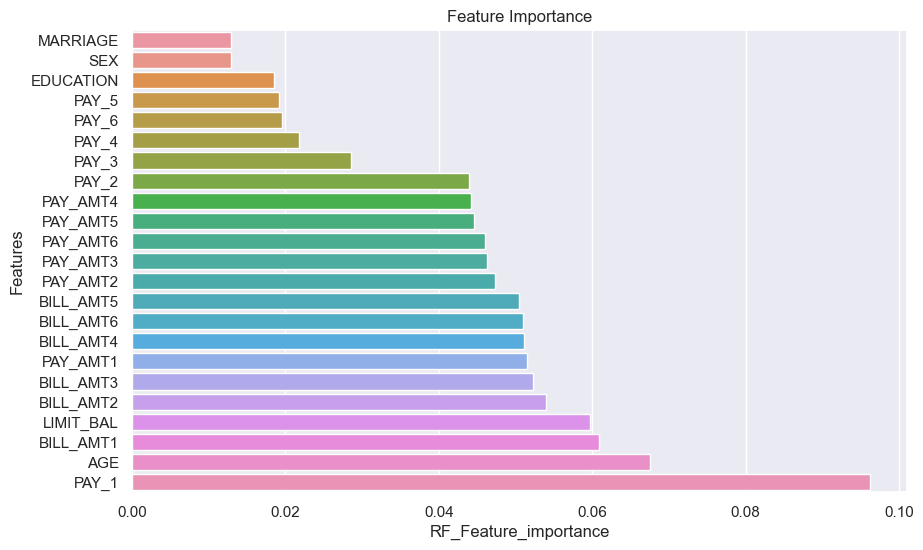

In [39]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='RF_Feature_importance', data=FIM)
plt.show()

Recall:
- PAY_1: repayment status in the past 1 month (paid in full, paid minimum due, delay for # months)
- PAY_2: repayment status in the past 2 months
- .... 
- BILL_AMT: amount of bill statement


---

---
---
# PyCaret

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **scikit-learn**: https://scikit-learn.org/stable/index.html
3. **PyCaret model containers** : https://github.com/pycaret/pycaret/tree/master/pycaret/containers/models

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [1]:
#only if you want to run it in Google Colab: 
# for this chapter, we can install the light version of PyCaret as below. 

# !pip install pycaret[full]

In [40]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button. 

# let's double ckeck the Pycaret version: 
from pycaret.utils import version
version()

'3.1.0'

In [41]:
from pycaret.classification import *


In [42]:
df_py = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/credit_card_clean.csv')

In [43]:
df_py.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [44]:
from pycaret.classification import *


In [45]:
setup(data=df_py,  target='DEFAULT',ignore_features=['ID'] , session_id=555, train_size=0.7, preprocess=True)


,Description,Value
0,Session id,555
1,Target,DEFAULT
2,Target type,Binary
3,Original data shape,"(30000, 25)"
4,Transformed data shape,"(30000, 29)"
5,Transformed train set shape,"(21000, 29)"
6,Transformed test set shape,"(9000, 29)"
7,Ignore features,1
8,Ordinal features,1
9,Numeric features,20


In [46]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## Create and tune model

In [47]:
xgboost = create_model(estimator='xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8167,0.7601,0.3879,0.6406,0.4832,0.3799,0.3975
1,0.8067,0.7476,0.3599,0.6051,0.4514,0.3431,0.3601
2,0.8090,0.7494,0.3276,0.6307,0.4312,0.3300,0.3556
3,0.8276,0.7642,0.3664,0.7143,0.4843,0.3935,0.4251
4,0.8090,0.7713,0.3772,0.6098,0.4660,0.3576,0.3729
5,0.8114,0.7481,0.3634,0.6283,0.4605,0.3560,0.3756
6,0.8157,0.7778,0.4086,0.6291,0.4954,0.3889,0.4024
7,0.8038,0.7689,0.3548,0.5957,0.4447,0.3348,0.3513
8,0.8090,0.7457,0.3398,0.6270,0.4407,0.3376,0.3607


In [49]:
ada_boost = create_model(estimator='ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8133,0.7668,0.3147,0.6636,0.4269,0.3319,0.3650
1,0.8200,0.7693,0.3384,0.6886,0.4538,0.3607,0.3934
2,0.8129,0.7535,0.3017,0.6699,0.4160,0.3232,0.3597
3,0.8238,0.7835,0.3233,0.7282,0.4478,0.3609,0.4032
4,0.8105,0.7771,0.3297,0.6375,0.4347,0.3344,0.3606
5,0.8171,0.7614,0.3226,0.6849,0.4386,0.3458,0.3809
6,0.8181,0.7824,0.3441,0.6751,0.4558,0.3602,0.3897
7,0.8205,0.7803,0.3398,0.6930,0.4560,0.3632,0.3964
8,0.8076,0.7594,0.2688,0.6614,0.3823,0.2916,0.3332


In [50]:
GBM = create_model(estimator='gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8190,0.7805,0.3621,0.6667,0.4693,0.3715,0.3967
1,0.8190,0.7726,0.3621,0.6667,0.4693,0.3715,0.3967
2,0.8162,0.7651,0.3448,0.6612,0.4533,0.3557,0.3829
3,0.8338,0.7861,0.3793,0.7426,0.5021,0.4147,0.4485
4,0.8114,0.7887,0.3664,0.6250,0.4620,0.3569,0.3757
5,0.8157,0.7685,0.3527,0.6560,0.4587,0.3596,0.3848
6,0.8195,0.7902,0.3871,0.6569,0.4871,0.3864,0.4063
7,0.8205,0.7877,0.3763,0.6679,0.4814,0.3829,0.4060
8,0.8190,0.7602,0.3398,0.6840,0.4540,0.3599,0.3916


In [ ]:
lightgbm = create_model(estimator='lightgbm')   

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8176,0.7734,0.3707,0.6540,0.4732,0.3729,0.3949
1,0.8114,0.7654,0.3513,0.6318,0.4515,0.3487,0.3706
2,0.8167,0.7631,0.3254,0.6771,0.4396,0.3457,0.3790
3,0.8357,0.7809,0.3728,0.7621,0.5007,0.4159,0.4541
4,0.8138,0.7856,0.3772,0.6318,0.4723,0.3679,0.3860
5,0.8157,0.7686,0.3570,0.6535,0.4618,0.3619,0.3860
6,0.8252,0.7925,0.4043,0.6763,0.5061,0.4080,0.4279
7,0.8224,0.7927,0.3785,0.6769,0.4855,0.3884,0.4124
8,0.8114,0.7648,0.3247,0.6481,0.4327,0.3342,0.3630


In [51]:
catboost = create_model(estimator='catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8262,0.7965,0.4065,0.6799,0.5087,0.4112,0.4313
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8152,0.7639,0.3290,0.6681,0.4409,0.3452,0.3764


In [61]:
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8167,0.7853,0.3685,0.6502,0.4704,0.3697,0.3915
1,0.8162,0.7756,0.3599,0.6523,0.4639,0.3640,0.3874
2,0.8171,0.7601,0.3534,0.6613,0.4607,0.3626,0.3884
3,0.8290,0.7856,0.3707,0.7197,0.4893,0.3990,0.4308
4,0.8133,0.7896,0.3685,0.6333,0.4659,0.3623,0.3818
5,0.8157,0.7707,0.3548,0.6548,0.4603,0.3608,0.3854
6,0.8219,0.7947,0.3914,0.6667,0.4932,0.3939,0.4145
7,0.8262,0.7899,0.3892,0.6908,0.4979,0.4026,0.4268
8,0.8214,0.7665,0.3441,0.6957,0.4604,0.3678,0.4006


Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Plot Model


In [53]:
plot_model(xgboost, plot = 'parameter')

,Parameters
objective,binary:logistic
base_score,None
booster,gbtree
callbacks,None
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,None
device,None
early_stopping_rounds,None
enable_categorical,False


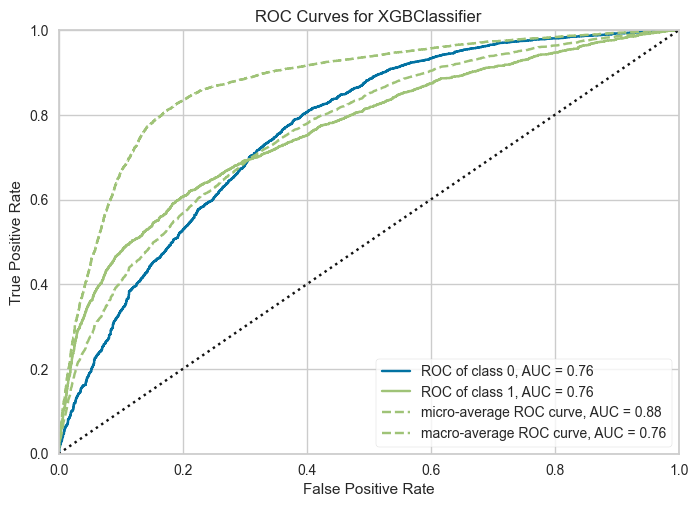

In [55]:
plot_model(xgboost, plot = 'auc')

the macro-average ROC curve calculates the TPR and FPR separately for each class, and then averages these values across all classes. Micro-average however, is the weighted average version! 

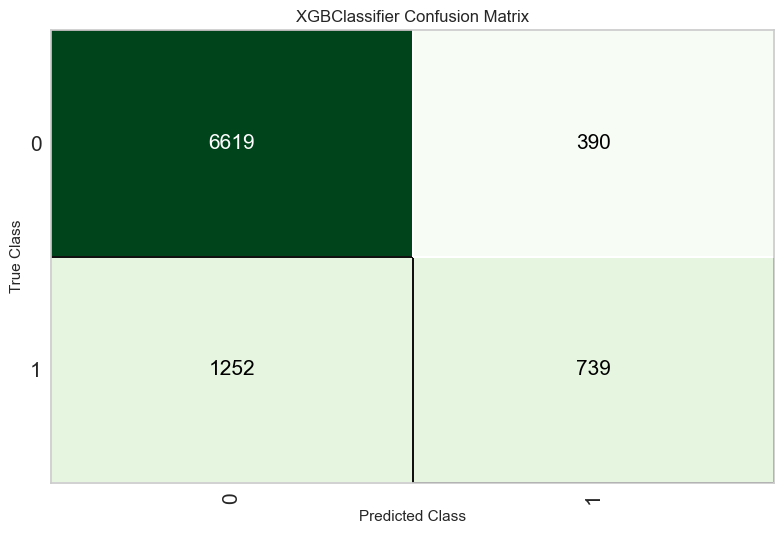

In [56]:
plot_model(xgboost, plot = 'confusion_matrix')

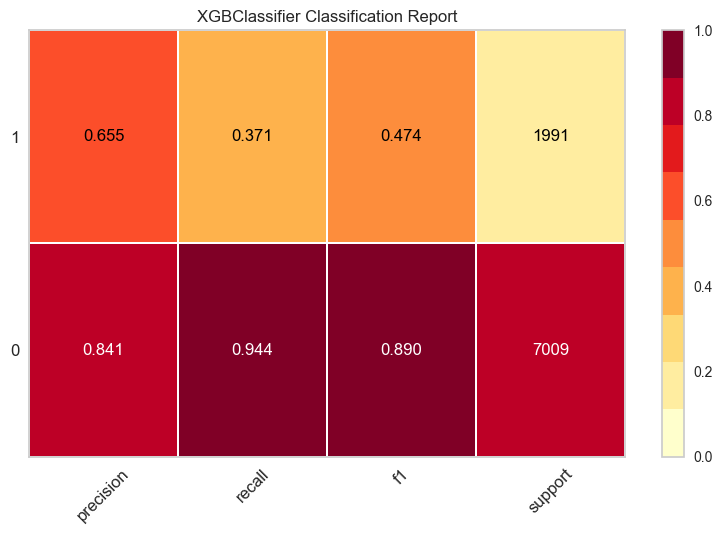

In [57]:
plot_model(xgboost, plot = 'class_report')

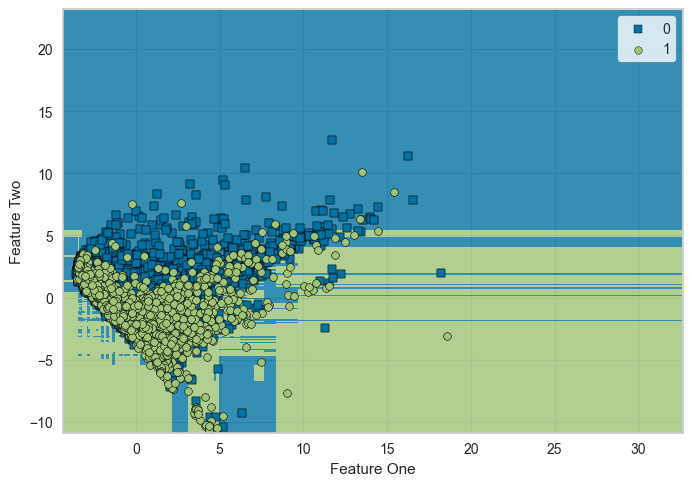

In [58]:
plot_model(xgboost, plot = 'boundary')

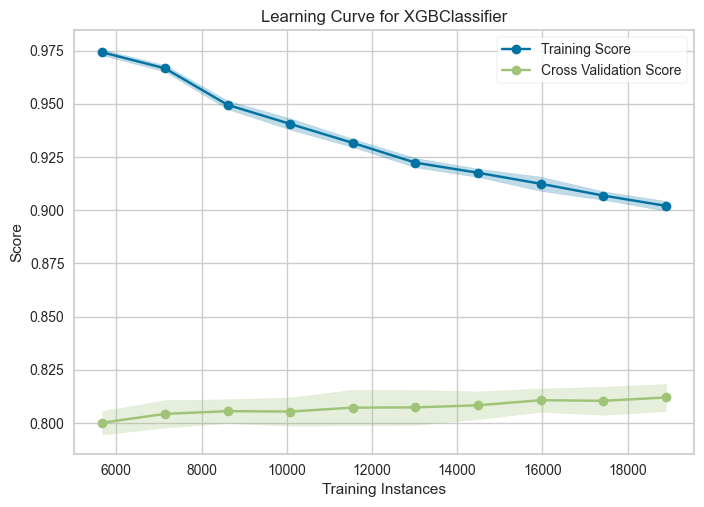

In [59]:
plot_model(xgboost, plot = 'learning')

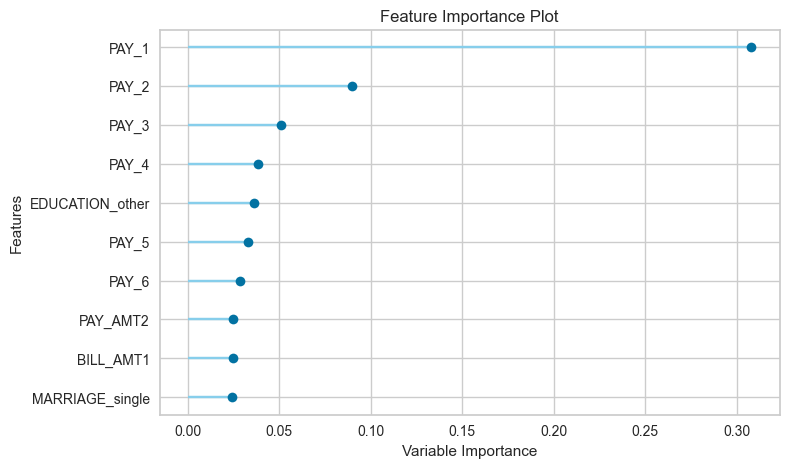

In [60]:
plot_model(xgboost, plot = 'feature')

###  Additional links:


1. Sklearn AdaBoost documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
2. Sklearn GBM documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
3. XGBoost Algorithm: Long May She Reign!: https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d
4. Advance boosting models: https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db
5. Understanding XGBoost and its hyperparameters: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
6. Interpreting XGBoost feature importance: https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27